In [2]:
import pandas as pd
df = pd.read_excel("./Kubernetes 1.24 Release Team Shadow Application (Responses).xlsx")
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

release_version="1.24"

In [3]:
# Filter applicants by returniung release team members and new applicants

returners = df[df['Have you previously served on a Kubernetes Release Team?'].str.contains("Yes")]
newcomers = df[df['Have you previously served on a Kubernetes Release Team?'].str.contains("No")]

release_teams = {
    "Bug Triage": {}, "CI Signal": {}, "Communications": {}, "Release Notes": {}, "Documentation": {}, "Enhancements": {}
}

for team in release_teams:
    teamApplicantsReturners = returners[returners['What release team roles are you interested in for '+release_version+'?'].str.contains(team)]
    teamApplicantsNewcomers = newcomers[newcomers['Which release roles are you interested in?'].str.contains(team)]
    release_teams[team] = {
        "returners": teamApplicantsReturners,
        "newcomers": teamApplicantsNewcomers
    }


In [7]:
# Some general plotting
import matplotlib.pyplot as plt
from plotting import pronouns_chart, make_autopct

# Release team names
release_team_names = release_teams.keys()

# Total applicants by team
def applicants_by_team():
    release_team_applicants = [len(v["returners"]) + len(v["newcomers"]) for _, v in release_teams.items()]
    fig1, ax1 = plt.subplots()
    ax1.pie(release_team_applicants, labels=release_team_names, autopct=make_autopct(release_team_applicants))
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    print("SIG-Release applicants for " + release_version + " by team")
    print("Total applicants: " + str(len(df)) + ", one applicant can apply to multiple teams")
    plt.show()

# Rejected newcomers which apply again
def reapplying_newcomers():
    print("Rejected newcomers which apply again")
    apply_again = {"Reapplying newcomers": 0, "First time applicants": 0, "Unclear": 0}
    for s in newcomers["Have you applied to any previous Kubernetes release teams?"]:
        s = str(s).lower()
        if "yes" in s or "yeah" in s:
            apply_again["Reapplying newcomers"] += 1
        elif "no" in s or "n/a" in s :
            apply_again["First time applicants"] += 1
        else:
            apply_again["Unclear"] += 1
    fig4, ax5 = plt.subplots()
    ax5.pie(apply_again.values(), labels=apply_again.keys(), autopct=make_autopct(apply_again.values()))
    ax5.axis('equal')
    plt.show()

# Timezones
def applicant_timezones():
    newcomers.rename({"What time zone are you normally in?" : "Returner What time zone are you normally in?"}, axis=1)
    for timezone in newcomers["What time zone are you normally in?"]: # ++ returners["What time zone are you normally in?"]:
        print(timezone)
    
    pass

applicants_by_team()
pronouns_chart(df["To help address everyone correctly, please share your pronouns if you're comfortable doing so. You can more about pronoun sharing here https://www.mypronouns.org/sharing"])
reapplying_newcomers()
applicant_timezones()


SyntaxError: invalid syntax (2284251027.py, line 3)

Newcomer & Returner applicants for CI Signal


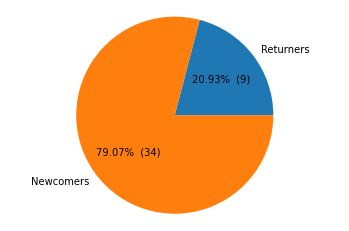

CI Signal applicants applied to other teams
33 of 43 also applied to one or more of the other teams


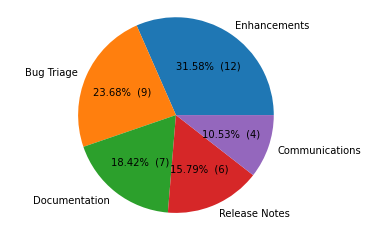

In [107]:
# Team specific charts

details_for_team = "CI Signal"

# filter newcomers and returners by team
def newcomers_and_returners(team):
    print("Newcomer & Returner applicants for "+ team)
    fig2, ax2 = plt.subplots()
    team_returners_and_newcomers = [len(release_teams[team]["returners"]), len(release_teams[team]["newcomers"])]
    ax2.pie(team_returners_and_newcomers, labels=["Returners", "Newcomers"], autopct=make_autopct(team_returners_and_newcomers))
    ax2.axis('equal')
    plt.show()

# filter applicants which also applied to another team
def applied_for_multiple_teams(team):
    print(team + " applicants applied to other teams")
    number_of_applicants_which_also_applied_to_another_team = 0
    fig3, ax3 = plt.subplots()
    applied_to_team_as_well = dict()
    
    # for returners
    for e in release_teams[team]["returners"]['What release team roles are you interested in for '+release_version+'?']:
        interested_in_teams = e.split(", ")
        if len(interested_in_teams) > 1:
            number_of_applicants_which_also_applied_to_another_team+=1
        for e in interested_in_teams:
            applied_to_team_as_well[e.strip()] = applied_to_team_as_well.get(e.strip(), 0) + 1

    # for newcomers
    for e in release_teams[team]["newcomers"]['Which release roles are you interested in?']:
        interested_in_teams = e.split(", ")
        if len(interested_in_teams) > 1:
            number_of_applicants_which_also_applied_to_another_team+=1
        for e in interested_in_teams:
            applied_to_team_as_well[e.strip()] = applied_to_team_as_well.get(e.strip(), 0) + 1
    
    del applied_to_team_as_well[team]
    print(str(number_of_applicants_which_also_applied_to_another_team) + " of " + str(len(release_teams[team]["returners"]) + len(release_teams[team]["newcomers"])) + " also applied to one or more of the other teams")
    ax3.pie(applied_to_team_as_well.values(), labels=applied_to_team_as_well.keys(), autopct=make_autopct(applied_to_team_as_well.values()))
    ax3.axis('equal')
    plt.show()

newcomers_and_returners(details_for_team)
applied_for_multiple_teams(details_for_team)